#Data
Student Performance Analysis

#Project Overview
This project analyzes student performance based on exam results in three subjects: **Math**, **Reading**, and **Writing**. The goal is to discover patterns and factors that may affect student outcomes such as gender, parental education, and preparation courses.



.

Goal
We want to answer real-world questions like:
- Does gender affect performance?
- Is test preparation useful?
- Which factors most impact math scores?

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.model_selection import cross_val_score

##  1. Gather – Loading the Dataset

In this step, we load the dataset into a pandas DataFrame to start our analysis. The dataset is stored as a CSV file named `StudentsPerformance.csv`. Let's take a look at the first few rows.


In [123]:
df=pd.read_csv("/content/StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## 🧾 Dataset Overview

This dataset contains information about students' performance on exams, along with demographic and background details. Here's what each column represents:

| Column | Description |
|--------|-------------|
| `gender` | Gender of the student: **male** or **female** |
| `race/ethnicity` | Demographic group (e.g. "group A", "group B", etc.) |
| `parental level of education` | Highest education level achieved by a parent (e.g. high school, bachelor’s degree) |
| `lunch` | Type of lunch received by the student: **standard** or **free/reduced** |
| `test preparation course` | Whether the student **completed** a test preparation course or not |
| `math score` | Score in the math exam (range: 0 to 100) |
| `reading score` | Score in the reading exam (range: 0 to 100) |
| `writing score` | Score in the writing exam (range: 0 to 100) |

---

The dataset includes **1000 students**, and we aim to understand how factors like gender, education, and preparation affect performance in math, reading, and writing.


.

.

## 🔍 2. Assess – Data Understanding

In this step, we begin exploring the dataset to understand its structure, quality, and potential issues.

We'll check for:

- The number of rows and columns.
- Data types of each column.
- Presence of any missing values.
- Summary statistics for numeric columns.
- Unusual or inconsistent values.

This early analysis helps us identify if any data cleaning is needed before moving to modeling or visualization.


In [124]:
for col in df.select_dtypes(include='object'):
    print(f"{col} → {df[col].unique()}")

gender → ['female' 'male']
race/ethnicity → ['group B' 'group C' 'group A' 'group D' 'group E']
parental level of education → ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch → ['standard' 'free/reduced']
test preparation course → ['none' 'completed']


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [126]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [127]:
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


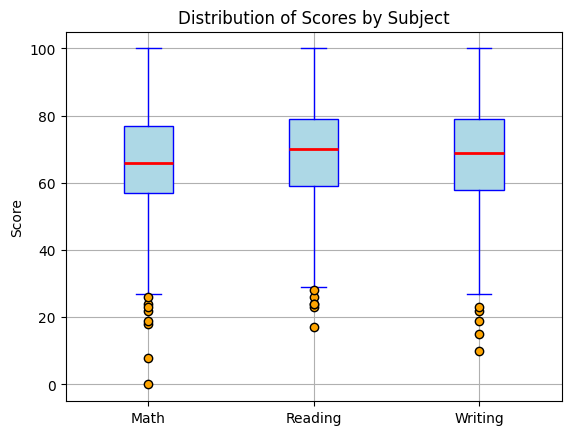

In [128]:
plt.boxplot([df['math score'], df['reading score'], df['writing score']],
            patch_artist=True,
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="red", linewidth=2),
            flierprops=dict(marker='o', markerfacecolor='orange', markersize=6),
            whiskerprops=dict(color="blue"),
            capprops=dict(color="blue"))

plt.xticks([1, 2, 3], ['Math', 'Reading', 'Writing'])

plt.title("Distribution of Scores by Subject")
plt.ylabel("Score")
plt.grid(True)
plt.show()

<ipython-input-129-481ff0056fa8>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=df, palette='pastel')


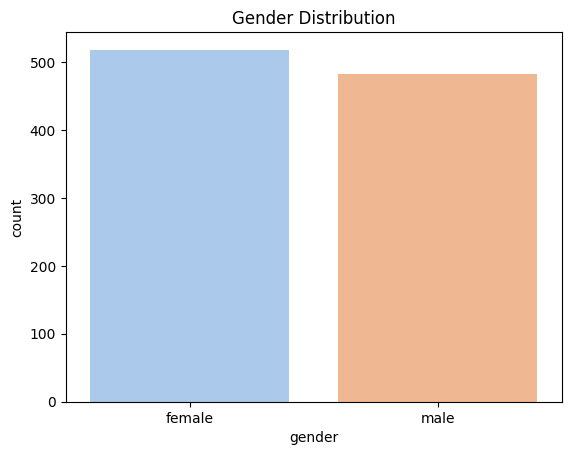

In [129]:
sns.countplot(x='gender', data=df, palette='pastel')
plt.title("Gender Distribution")
plt.show()


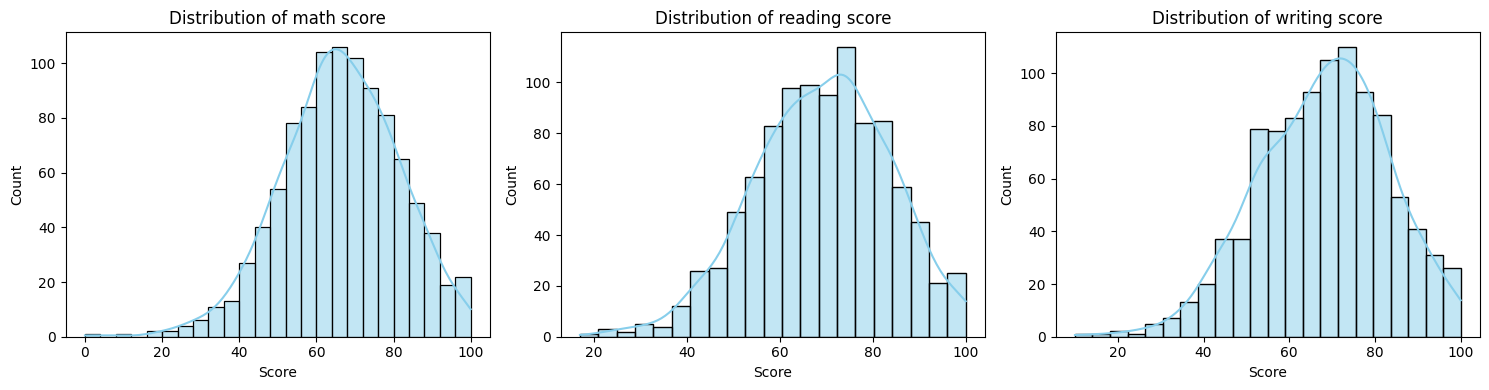

In [130]:
subjects = ['math score', 'reading score', 'writing score']
plt.figure(figsize=(15, 4))

for i, subject in enumerate(subjects):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[subject], kde=True, color='skyblue')
    plt.title(f'Distribution of {subject}')
    plt.xlabel("Score")
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

## 📊 Initial Observations

- There are **no missing values** in the dataset — that’s a great start!
- The exam scores in math, reading, and writing are mostly around **68**, meaning most students scored somewhere near that number.
- The standard deviation is about **15**, so scores are fairly close to each other with some natural variation.
- Some students got a **0 in math**, which shows a big difference in performance between students.

## 🧠 Feature Types

- The dataset has:
  - **5 categorical columns** (text):
    - `gender`
    - `race/ethnicity`
    - `parental level of education`
    - `lunch`
    - `test preparation course`
  - **3 numerical columns**:
    - `math score`
    - `reading score`
    - `writing score`

## 👥 Categorical Values

- **Gender**: `['female', 'male']`  
  → 518 females, 482 males  
  → We'll use simple encoding: **0 = female**, **1 = male**

- **Race/Ethnicity**: `['group B', 'group C', 'group A', 'group D', 'group E']`  
  → No natural order → We'll use **One-Hot Encoding**

- **Parental Level of Education**:  
  → `["bachelor's degree", 'some college', "master's degree", "associate's degree", 'high school', 'some high school']`  
  → Also no order → **One-Hot Encoding**

- **Lunch**: `['standard', 'free/reduced']`  
  → Two options → We'll use **Label Encoding**

- **Test Preparation Course**: `['none', 'completed']`  
  → Two options → We'll use **Label Encoding**


.

.

.

## 🧼 3. Clean – Preparing the Data

To train a machine learning model, we need all features to be numerical.

We'll encode the categorical variables using **Label Encoding** or **One-Hot Encoding**, depending on the situation.

There are 5 categorical columns to transform:

- `gender`
- `race/ethnicity`
- `parental level of education`
- `lunch`
- `test preparation course`


In [131]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [132]:
# encoder the gender
le=LabelEncoder()
df["gender"]=le.fit_transform(df["gender"])
df["lunch"]=le.fit_transform(df["lunch"])
df["test preparation course"]=le.fit_transform(df["test preparation course"])

In [133]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,group B,bachelor's degree,1,1,72,72,74
1,0,group C,some college,1,0,69,90,88
2,0,group B,master's degree,1,1,90,95,93
3,1,group A,associate's degree,0,1,47,57,44
4,1,group C,some college,1,1,76,78,75


In [134]:
OH = OneHotEncoder(sparse_output=False)

education_encoded = OH.fit_transform(df[['parental level of education']])

education_df = pd.DataFrame(education_encoded, columns=OH.categories_[0])

df = pd.concat([df, education_df], axis=1)

race_encoded = OH.fit_transform(df[['race/ethnicity']])
race_df = pd.DataFrame(race_encoded, columns=OH.categories_[0])

df = pd.concat([df, race_df], axis=1)

df.drop(['parental level of education', 'race/ethnicity'], axis=1, inplace=True)

In [135]:
df.head()

,gender,lunch,test preparation course,math score,reading score,writing score,associate's degree,bachelor's degree,high school,master's degree,some college,some high school,group A,group B,group C,group D,group E
0,0,1,1,72,72,74,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0,1,0,69,90,88,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0,1,1,90,95,93,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1,0,1,47,57,44,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1,1,1,76,78,75,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [136]:
X=df.drop(["math score"],axis=1)
y=df["math score"]

In [137]:
y

,math score
0,72
1,69
2,90
3,47
4,76
...,...
995,88
996,62
997,59
998,68


In [138]:
Ximport=X

In [139]:
scaler = StandardScaler()
X=scaler.fit_transform(X)

In [140]:
X

array([[-0.96462528,  0.74188112,  0.74674788, ..., -0.68441857,
        -0.59583014, -0.40347329],
       [-0.96462528,  0.74188112, -1.33914006, ...,  1.46109419,
        -0.59583014, -0.40347329],
       [-0.96462528,  0.74188112,  0.74674788, ..., -0.68441857,
        -0.59583014, -0.40347329],
       ...,
       [-0.96462528, -1.34792485, -1.33914006, ...,  1.46109419,
        -0.59583014, -0.40347329],
       [-0.96462528,  0.74188112, -1.33914006, ..., -0.68441857,
         1.67833069, -0.40347329],
       [-0.96462528, -1.34792485,  0.74674788, ..., -0.68441857,
         1.67833069, -0.40347329]])

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 🔥 6. Model Training and Evaluation

### 📊 Step 1: Model Selection
Now that we've split the data, we can start training the model. We'll begin with a simple model like **Linear Regression** to predict the math scores.

### 📈 Step 2: Training the Model
We will use the training data (`X_train` and `y_train`) to fit the model.



In [116]:
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('Random Forest', RandomForestRegressor()),
    ('Support Vector Machine', SVR()),
    ('XGBoost', xgb.XGBRegressor())
]

for name, model in models:

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # طباعة النتائج لكل نموذج
    print(f"Model: {name}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")
    print("-" * 50)

Model: Linear Regression
Mean Squared Error: 29.095169866715487
R-squared: 0.8804332983749565
--------------------------------------------------
Model: Decision Tree
Mean Squared Error: 64.72
R-squared: 0.7340329352046369
--------------------------------------------------
Model: Random Forest
Mean Squared Error: 36.659975402777775
R-squared: 0.8493457037492735
--------------------------------------------------
Model: Support Vector Machine
Mean Squared Error: 83.24229285739591
R-squared: 0.6579155083727192
--------------------------------------------------
Model: XGBoost
Mean Squared Error: 42.320831298828125
R-squared: 0.8260824084281921
--------------------------------------------------


In [117]:
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('Random Forest', RandomForestRegressor()),
    ('Support Vector Machine', SVR()),
    ('XGBoost', xgb.XGBRegressor())  # إضافة XGBoost هنا
]

# استخدام حلقة لتطبيق Cross-validation لكل نموذج
for name, model in models:
    # تطبيق Cross-validation
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

    # تحويل القيم السلبية إلى إيجابية
    cv_scores = np.abs(cv_scores)

    # طباعة نتائج Cross-validation
    print(f"Model: {name}")
    print(f"Cross-validation MSE: {cv_scores}")
    print(f"Average MSE: {cv_scores.mean()}")
    print("-" * 50)

Model: Linear Regression
Cross-validation MSE: [29.71964584 29.2256683  32.0200768  25.7234009  29.03311251]
Average MSE: 29.144380869812345
--------------------------------------------------
Model: Decision Tree
Cross-validation MSE: [77.36    62.49    66.33    69.67625 71.115  ]
Average MSE: 69.39425
--------------------------------------------------
Model: Random Forest
Cross-validation MSE: [41.33360288 33.15741038 41.35473125 32.85509411 38.66355337]
Average MSE: 37.472878398366205
--------------------------------------------------
Model: Support Vector Machine
Cross-validation MSE: [82.8983385  58.26259167 65.15568615 59.30468296 71.00380016]
Average MSE: 67.32501988731076
--------------------------------------------------
Model: XGBoost
Cross-validation MSE: [41.72897339 44.98455429 46.92567444 38.27000809 43.02729034]
Average MSE: 42.987300109863284
--------------------------------------------------


.

## 📊 **Model Results**

After performing exploratory data analysis and data cleaning, we trained several models to predict students' math scores. We evaluated the models based on **MSE** and **R-squared**.

### ✅ **Best Models**

1. **Linear Regression**:
   - **MSE**: 29.10
   - **R-squared**: 0.88
   - **Interpretation**: The best performing model was **Linear Regression**, with an **R-squared** of 0.88, meaning it explains 88% of the variance in the data.

2. **Random Forest**:
   - **MSE**: 36.66
   - **R-squared**: 0.85
   - **Interpretation**: The second best model was **Random Forest**, showing good performance in predicting math scores.

3. **Decision Tree**:
   - **MSE**: 64.72
   - **R-squared**: 0.73
   - **Interpretation**: **Decision Tree** had a slightly higher MSE and lower R-squared, meaning it performed less effectively than the first two models.
   
4. **Support Vector Machine (SVM)**:
   - **MSE**: 83.24
   - **R-squared**: 0.66
   - **Interpretation**: **SVM** performed poorly compared to other models with the highest MSE and the lowest R-squared.

5. **XGBoost**:
   - **MSE**: 42.32
   - **R-squared**: 0.83
   - **Interpretation**: **XGBoost** gave good performance but didn't outperform **Random Forest** or **Linear Regression**.

### ✅ **Conclusion**

The **best model** for predicting math scores was **Linear Regression** with an **R-squared of 0.88**. This indicates that the model has a good fit for the data and is able to predict math scores effectively.

Future improvements can be made by fine-tuning model parameters or trying advanced feature engineering to increase the model's performance.
